Note to grader: Each question is assigned with a score. The final score will be (sum of actual scores)/(sum of maximum scores)*100. The grading rubrics are shown in the TA guidelines.


In [ ]:
# Grader's area
import numpy as np
actualScore = 0
maxScore = 0


# **Assignment 6**
<br>

<font>

In [ ]:
from IPython.display import Math
from IPython.display import Latex

import numpy as np
import os
import struct

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

torch.manual_seed(0)

----------------
----------------
----------------

## <font color='blue'> **Question 1.** Visualizing convergence. </font>

Modify this code so that in every epoch it records:

**a.** The training loss, accuracy [10 pt] <br>
**b.** The test loss, accuracy [10 pt]

Then:

**c.** Run the model for 20 epochs and give two plots (one for losses, one for accuracies) for the convergence behavior over 20 epochs. [10 pt]

<br>

**Note:**
Make sure you avoid updating the weights when you use the test set. For that you should consult the notebook from CNNs lecture.




In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x)) # activation function  for first scalar for first output prcocess
        x = F.relu(self.fc2(x)) # activation function for second scalar for second output process, not our 10 classes yet
        x = self.fc3(x) # last outout
        return x
# we go through the first conv layer then we activat func then get the max pooling, do it again for the second layer then flatten it to be scalar then we put the act fun over twice to then get the last output self.fc(x)
# initialize the model
net = Net()

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss() # loss function to calclate loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # this our optimization function using SGD

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times
  # Question 1 part A ***** CHANGED ORIGINAL CODE TO FIT PART  A ********
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) # Feeding forward the input through the neural network (forwardd)
        loss = criterion(outputs, labels) # Computes loss of diff  ouput to correct label (how far we are from correct outcome)
        loss.backward() # Back propigation to go back and do optimizer.step()
        optimizer.step() # Updates the parameter (using SGD to update the weights)

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

        # Accuracy test
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test set after epoch {epoch + 1}: {accuracy:.2f}%')

print('Finished Training')
#print(outputs)

[1,  2000] loss: 2.213
[1,  4000] loss: 1.871
[1,  6000] loss: 1.705
[1,  8000] loss: 1.588
[1, 10000] loss: 1.531
[1, 12000] loss: 1.488
Accuracy on test set after epoch 1: 48.76%
[2,  2000] loss: 1.416
[2,  4000] loss: 1.388
[2,  6000] loss: 1.385
[2,  8000] loss: 1.346
[2, 10000] loss: 1.315
[2, 12000] loss: 1.318
Accuracy on test set after epoch 2: 54.03%
Finished Training


In [ ]:
### Your code here. Also give some comments about your findings
'''
**a.** The training loss, accuracy [10 pt] <br>
**b.** The test loss, accuracy [10 pt]
**c.** Run the model for 20 epochs and give two plots (one for losses, one for accuracies) for the convergence behavior over 20 epochs. [10 pt]
'''
# Question 1 Part b
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(testloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 500 == 499:    # Print every 500 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
  # Accuracy test
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test set after epoch {epoch + 1}: {accuracy:.2f}%')

print('Finished Testing')

[1,   500] loss: 0.323
[1,  1000] loss: 0.331
[1,  1500] loss: 0.318
[1,  2000] loss: 0.320
[1,  2500] loss: 0.324
Accuracy on test set after epoch 1: 58.86%
[2,   500] loss: 0.293
[2,  1000] loss: 0.301
[2,  1500] loss: 0.287
[2,  2000] loss: 0.292
[2,  2500] loss: 0.295
Accuracy on test set after epoch 2: 61.91%
Finished Testing


[1,  2000] loss: 1.239
[1,  4000] loss: 1.243
[1,  6000] loss: 1.212
[1,  8000] loss: 1.219
[1, 10000] loss: 1.209
[1, 12000] loss: 1.197
Epoch 1, Loss: 1.197, Accuracy: 56.86%
[2,  2000] loss: 1.126
[2,  4000] loss: 1.113
[2,  6000] loss: 1.134
[2,  8000] loss: 1.142
[2, 10000] loss: 1.149
[2, 12000] loss: 1.106
Epoch 2, Loss: 1.106, Accuracy: 60.09%
[3,  2000] loss: 1.037
[3,  4000] loss: 1.038
[3,  6000] loss: 1.054
[3,  8000] loss: 1.083
[3, 10000] loss: 1.078
[3, 12000] loss: 1.071
Epoch 3, Loss: 1.071, Accuracy: 62.48%
[4,  2000] loss: 0.968
[4,  4000] loss: 1.009
[4,  6000] loss: 0.992
[4,  8000] loss: 1.005
[4, 10000] loss: 1.016
[4, 12000] loss: 1.044
Epoch 4, Loss: 1.044, Accuracy: 64.62%
[5,  2000] loss: 0.934
[5,  4000] loss: 0.905
[5,  6000] loss: 0.970
[5,  8000] loss: 0.955
[5, 10000] loss: 0.982
[5, 12000] loss: 0.985
Epoch 5, Loss: 0.985, Accuracy: 66.08%
[6,  2000] loss: 0.876
[6,  4000] loss: 0.911
[6,  6000] loss: 0.903
[6,  8000] loss: 0.943
[6, 10000] loss: 0.943


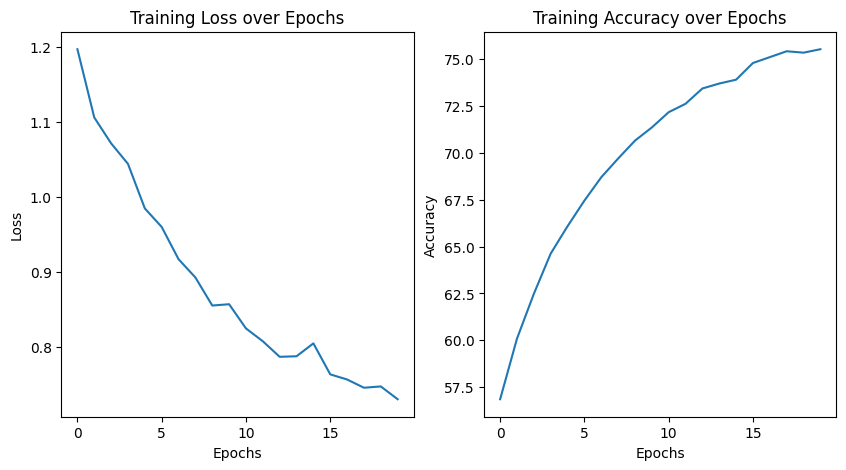

Finished Training Over 20 Epochs


In [ ]:
losses = []
accuracies = []
end_loss = 0
for epoch in range(20):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            end_loss = running_loss/2000
            running_loss = 0.0
    # Calculating accuracy
    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    losses.append(end_loss)
    print(f'Epoch {epoch + 1}, Loss: {end_loss:.3f}, Accuracy: {accuracy:.2f}%')
# Creating plot figure
plt.figure(figsize=(10, 5))
# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
print("Finished Training Over 20 Epochs")

In [ ]:
# For grader use only


maxScore = maxScore + 30


------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 2.** Learning random labels. </font>

Reuse the above code, but instead of using the given input labels on the training set, use random labels. Then run for 40 epochs.
<br>

**a.** Report the plots for the training accuracy. **[10 pt]** <br>
**b.** What is the final training accuracy and final testing accuracy? **[10 pt]** <br>
**c.** What would be the expected accuracy for a random baseline model? **[10 pt]**





Epoch 1, Loss: 0.730, Accuracy: 9.83%
Epoch 2, Loss: 0.730, Accuracy: 9.87%
Epoch 3, Loss: 0.730, Accuracy: 9.76%
Epoch 4, Loss: 0.730, Accuracy: 9.99%
Epoch 5, Loss: 0.730, Accuracy: 10.14%
Epoch 6, Loss: 0.730, Accuracy: 9.84%
Epoch 7, Loss: 0.730, Accuracy: 9.89%
Epoch 8, Loss: 0.730, Accuracy: 10.26%
Epoch 9, Loss: 0.730, Accuracy: 9.81%
Epoch 10, Loss: 0.730, Accuracy: 9.84%
Epoch 11, Loss: 0.730, Accuracy: 10.15%
Epoch 12, Loss: 0.730, Accuracy: 10.10%
Epoch 13, Loss: 0.730, Accuracy: 10.12%
Epoch 14, Loss: 0.730, Accuracy: 9.78%
Epoch 15, Loss: 0.730, Accuracy: 9.97%
Epoch 16, Loss: 0.730, Accuracy: 10.13%
Epoch 17, Loss: 0.730, Accuracy: 9.97%
Epoch 18, Loss: 0.730, Accuracy: 10.09%
Epoch 19, Loss: 0.730, Accuracy: 9.63%
Epoch 20, Loss: 0.730, Accuracy: 9.96%
Epoch 21, Loss: 0.730, Accuracy: 10.07%
Epoch 22, Loss: 0.730, Accuracy: 9.87%
Epoch 23, Loss: 0.730, Accuracy: 9.63%
Epoch 24, Loss: 0.730, Accuracy: 10.03%
Epoch 25, Loss: 0.730, Accuracy: 10.08%
Epoch 26, Loss: 0.730, A

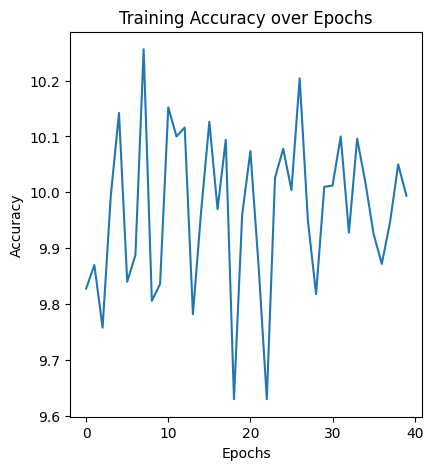

Finished Training Over 40 Epochs
Epoch 1, Loss: 0.730, Accuracy: 10.04%
Epoch 2, Loss: 0.730, Accuracy: 9.52%
Epoch 3, Loss: 0.730, Accuracy: 9.75%
Epoch 4, Loss: 0.730, Accuracy: 9.76%
Epoch 5, Loss: 0.730, Accuracy: 9.87%
Epoch 6, Loss: 0.730, Accuracy: 9.27%
Epoch 7, Loss: 0.730, Accuracy: 9.90%
Epoch 8, Loss: 0.730, Accuracy: 9.83%
Epoch 9, Loss: 0.730, Accuracy: 10.09%
Epoch 10, Loss: 0.730, Accuracy: 10.02%
Epoch 11, Loss: 0.730, Accuracy: 10.27%
Epoch 12, Loss: 0.730, Accuracy: 10.21%
Epoch 13, Loss: 0.730, Accuracy: 10.90%
Epoch 14, Loss: 0.730, Accuracy: 9.94%
Epoch 15, Loss: 0.730, Accuracy: 9.75%
Epoch 16, Loss: 0.730, Accuracy: 9.89%
Epoch 17, Loss: 0.730, Accuracy: 10.12%
Epoch 18, Loss: 0.730, Accuracy: 10.20%
Epoch 19, Loss: 0.730, Accuracy: 9.97%
Epoch 20, Loss: 0.730, Accuracy: 9.99%
Epoch 21, Loss: 0.730, Accuracy: 9.97%
Epoch 22, Loss: 0.730, Accuracy: 9.97%
Epoch 23, Loss: 0.730, Accuracy: 9.97%
Epoch 24, Loss: 0.730, Accuracy: 9.79%
Epoch 25, Loss: 0.730, Accuracy:

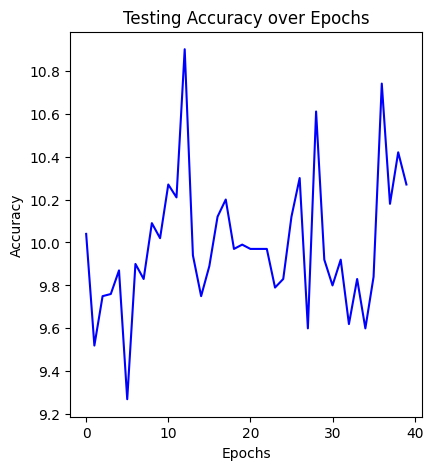

Finished Testing Over 40 Epochs


In [ ]:
## your code goes here

# initialize the model
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
losses = []
accuracies = []
# Training process
for epoch in range(40):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        labels = torch.randint(0, 10, (inputs.size(0),))
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #if i % 2000 == 1999:    # print every 2000 mini-batches
           #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            #running_loss = 0.0
    # Calculate accuracy
    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    losses.append(end_loss)
    print(f'Epoch {epoch + 1}, Loss: {end_loss:.3f}, Accuracy: {accuracy:.2f}%')

# Plotting the Traing Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracies, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.show()

print('Finished Training Over 40 Epochs')
losses = []
accuracies = []
# Training process
for epoch in range(40):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(testloader, 0):
        inputs, _ = data
        labels = torch.randint(0, 10, (inputs.size(0),))
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #if i % 2000 == 1999:    # print every 2000 mini-batches
            #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            #running_loss = 0.0
    # Calculate accuracy
    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    losses.append(end_loss)
    print(f'Epoch {epoch + 1}, Loss: {end_loss:.3f}, Accuracy: {accuracy:.2f}%')

# Plotting the accuracies for testing
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Testing Accuracy', color='blue')
plt.title('Testing Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

print('Finished Testing Over 40 Epochs')

b. The final training accuracy is 9.99%and final testing accuracy is 10.27%.<br>
c. The expected accuracy for a random baseline model would be 10% since if we are randomly picking a correct answer from 10 options we would expect to get 1 right out of 10 and that would be a 10% probability of success.

In [ ]:
# For grader use only


maxScore = maxScore + 30


------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 3.** Modifying the model for MNIST. </font>

Let's now work with the MNIST dataset.
<br>

**a.** Download and prepare the dataloaders for the standard MNIST dataset. **[10 pt]** <br>
**b.** Modify the model so that it works with the MNIST dataset. The inner array sizes should be roughly similar, but you can adjust them in the way you choose **[20 pt]** <br>
**c.** Report the training and test accuracy after 10 epochs **[10 pt]**





In [ ]:
## your code goes
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5, ))])

batch_size = 20

trainset = torchvision.datasets.MNIST(root='./mnistdata', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./mnistdata', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

classes = ('0', '1', '2', '3','4', '5', '6', '7', '8', '9')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x
# we go through the first conv layer then we activat func then get the max pooling, do it again for the second layer then flatten it to be scalar then we put the act fun over twice to then get the last output self.fc(x)
# initialize the model
net = Net()

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss() # loss function to calclate loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # this our optimization function using SGD

Epoch 1, Accuracy: 85.64%
Epoch 2, Accuracy: 95.81%
Epoch 3, Accuracy: 96.92%
Epoch 4, Accuracy: 97.49%
Epoch 5, Accuracy: 97.83%
Epoch 6, Accuracy: 97.99%
Epoch 7, Accuracy: 98.26%
Epoch 8, Accuracy: 98.42%
Epoch 9, Accuracy: 98.45%
Epoch 10, Accuracy: 98.58%


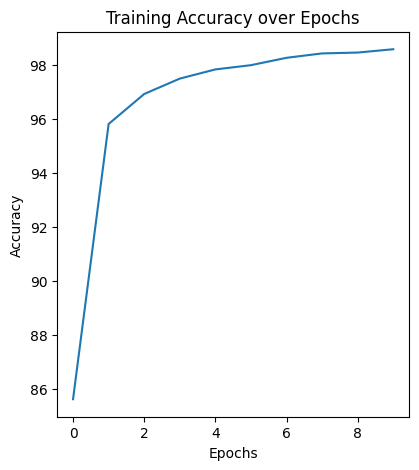

Finished Training Over 10 Epochs
Epoch 1, Accuracy: 98.32%
Epoch 2, Accuracy: 98.57%
Epoch 3, Accuracy: 98.45%
Epoch 4, Accuracy: 98.85%
Epoch 5, Accuracy: 99.04%
Epoch 6, Accuracy: 99.11%
Epoch 7, Accuracy: 99.15%
Epoch 8, Accuracy: 99.05%
Epoch 9, Accuracy: 99.22%
Epoch 10, Accuracy: 99.45%


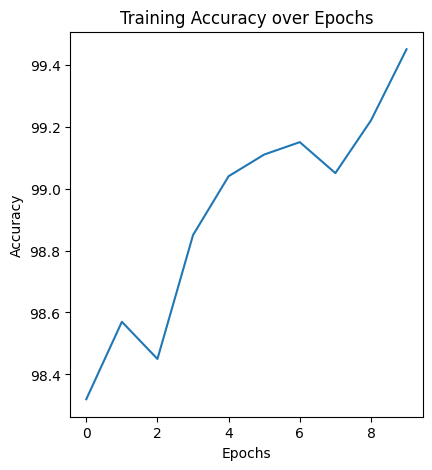

Finished Testing Over 10 Epochs


In [ ]:
accuracies = []
# Training process
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #if i % 2000 == 1999:    # print every 2000 mini-batches
           #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            #running_loss = 0.0
    # Calculate accuracy
    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    losses.append(end_loss)
    print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracies, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
print('Finished Training Over 10 Epochs')


accuracies = []
# Testing process
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #if i % 2000 == 1999:    # print every 2000 mini-batches
           #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            #running_loss = 0.0
    # Calculate accuracy
    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    losses.append(end_loss)
    print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.2f}%')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Testing Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
print('Finished Testing Over 10 Epochs')

C. The Training Acccuracy after 10 epochs is 98.58%. The Testing accuracy after 10 epcohs is 99.45%.

In [ ]:
# For grader use only



maxScore = maxScore + 40


------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 4.** MNIST on randomly permuted images. [**optional**]</font>

In this question we will see whether a CNN remains as effective for randomly permuted images.
<br>

**a.** Find a way to randomly permute the entries of a 2d array in numpy or a 2d tensor in PyTorch. This should be 2-3 lines of code - feel free to discuss it on Canvas. **[10 pt]** <br>
**b.** Train the model from question 3 on a training set where the images in the training set have re-arranged in a **random** way, which however is the **same** across all images. **[20 pt]** <br>
**c.** Report the training and test accuracy after 10 epochs, and after 20 epochs. **[10 pt]**





In [ ]:
## your code goes here
# part a using np.random.shuffle
import numpy as np
x = np.random.random((4, 4))
print(x)
x = np.random.shuffle(x)
print(x)

In [ ]:
# For grader use only


maxScore = maxScore + 40

In [ ]:
# for grader use

# Total Grade Calculation

score = actualScore*100/maxScore